In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv("brain_cptac_2020_clinical_data.csv")

In [4]:
df.head()

,Study ID,Patient ID,Sample ID,AGE,Age at Chemotherapy Start,Age at Chemotherapy Stop,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Radiation Start,Age at Radiation Stop,...,Sex,Surgery,Timing Other Notes,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
0,brain_cptac_2020,PT_CWD717Q0,7316-101,9,NaN,NaN,3472,4008,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I
1,brain_cptac_2020,PT_3X3MF8ZD,7316-114,30,11201.0,11242.0,11184,11881,11215.0,11247.0,...,Female,Yes,Not Reported,New,Diagnosis,Treatment naive,Midline,"Brain Stem- Pons,Brain Stem-Medulla,Spinal Cor...",Second Malignancy,IV
2,brain_cptac_2020,PT_ZVV78QP5,7316-117,9,NaN,NaN,3354,4499,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
3,brain_cptac_2020,PT_SMDEQVHJ,7316-119,1,NaN,NaN,649,1805,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,II
4,brain_cptac_2020,PT_FAD8FQ6S,7316-120,17,NaN,NaN,6287,7170,NaN,NaN,...,Female,Yes,NaN,New,Diagnosis,Treatment naive,Temporal Lobe,Temporal Lobe,Primary,I


In [5]:
df.tail()

,Study ID,Patient ID,Sample ID,AGE,Age at Chemotherapy Start,Age at Chemotherapy Stop,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Radiation Start,Age at Radiation Stop,...,Sex,Surgery,Timing Other Notes,Treatment,Treatment Changed,Treatment Status,Tumor Location Condensed,Tumor Tissue Site,Tumor Type,Updated Grade
131,brain_cptac_2020,PT_MQYPS0W1,7316-942,11,NaN,NaN,4193,4808,NaN,NaN,...,Female,NaN,NaN,No treatment,Diagnosis,Post-treatment,Cortical,"Occipital Lobe,Parietal Lobe,Temporal Lobe",Progression,III/IV
132,brain_cptac_2020,PT_KMHGNCNR,7316-944,1,NaN,NaN,421,2131,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Post-treatment,Optic Pathway,"Cerebellum/Posterior Fossa,Optic Pathway,Other...",recurrence,Unavailable
133,brain_cptac_2020,PT_PGVQ4XRZ,7316-946,12,NaN,NaN,4513,5301,NaN,NaN,...,Male,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
134,brain_cptac_2020,PT_RFF7MKTC,7316-954,4,NaN,NaN,1818,2505,NaN,NaN,...,Female,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I
135,brain_cptac_2020,PT_8XZY6MM1,7316-957,7,NaN,NaN,2810,3090,NaN,NaN,...,Female,Yes,NaN,New,Diagnosis,Treatment naive,Cerebellar,Cerebellum/Posterior Fossa,Primary,I


In [6]:
df.describe()

,AGE,Age at Chemotherapy Start,Age at Chemotherapy Stop,Age at Initial Diagnosis,Age at Last Known Clinical Status,Age at Radiation Start,Age at Radiation Stop,Age at Specimen Diagnosis,CTNNB1 Status,DFS Months,Ependymoma_RELA Status,Mutation Count,OS Months,Number of Samples Per Patient
count,136.000000,17.000000,14.000000,136.000000,136.000000,16.000000,16.000000,136.000000,0.0,131.000000,0.0,127.000000,131.000000,136.000000
mean,8.823529,4743.352941,3990.214286,3396.058824,4816.161765,5209.125000,5254.125000,3751.360294,NaN,26.358779,NaN,41.433071,47.816794,1.132353
std,6.327930,2864.188889,2860.603572,2304.496445,2349.865289,2725.209616,2721.872661,2238.379244,NaN,29.317642,NaN,43.426565,50.237559,0.340127
min,0.000000,577.000000,676.000000,5.000000,480.000000,1923.000000,1969.000000,155.000000,NaN,0.000000,NaN,3.000000,0.000000,1.000000
25%,3.000000,2463.000000,2097.000000,1424.750000,3022.000000,2832.000000,2879.750000,1887.000000,NaN,9.000000,NaN,12.000000,17.500000,1.000000
50%,9.000000,4405.000000,3160.000000,3325.000000,4592.500000,4362.500000,4414.000000,3787.500000,NaN,19.000000,NaN,23.000000,35.000000,1.000000
75%,13.000000,6814.000000,5453.750000,4933.250000,6241.000000,7519.500000,7564.250000,5029.750000,NaN,36.000000,NaN,57.500000,57.000000,1.000000
max,30.000000,11201.000000,11242.000000,11184.000000,11881.000000,11215.000000,11247.000000,11184.000000,NaN,224.000000,NaN,250.000000,358.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Study ID                                   136 non-null    object 
 1   Patient ID                                 136 non-null    object 
 2   Sample ID                                  136 non-null    object 
 3   AGE                                        136 non-null    int64  
 4   Age at Chemotherapy Start                  17 non-null     float64
 5   Age at Chemotherapy Stop                   14 non-null     float64
 6   Age at Initial Diagnosis                   136 non-null    int64  
 7   Age at Last Known Clinical Status          136 non-null    int64  
 8   Age at Radiation Start                     16 non-null     float64
 9   Age at Radiation Stop                      16 non-null     float64
 10  Age at Specimen Diagnosis 

In [8]:
df.isnull().sum()

,0
Study ID,0
Patient ID,0
Sample ID,0
AGE,0
Age at Chemotherapy Start,119
...,...
Treatment Status,0
Tumor Location Condensed,0
Tumor Tissue Site,0
Tumor Type,0


In [9]:
print(df.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'AGE',
       'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
       'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
       'Age at Radiation Start', 'Age at Radiation Stop',
       'Age at Specimen Diagnosis', 'Age Class', 'BRAF_RELA Status',
       'BRAF Status', 'BRAF Status2', 'Cancer Predispositions', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy', 'Chemotherapy Agents',
       'Chemotherapy Type', 'Clinical Status at Collection Event',
       'Completed Radiation Dose', 'Completed Total Radiation Dose',
       'CTNNB1 Status', 'DFS Months', 'DFS Status', 'Ependymoma_RELA Status',
       'Ethnicity', 'Extent of Tumor Resection', 'External Patient ID',
       'Formulation', 'H3F3A_CTNNB1 Status', 'HGG_H3F3A Status',
       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type',
       'LGG_BRAF Status', 'Medical Conditions',
       'Multiple Cancer Predispositions', 'Multiple Medica

Data Pre-processing

In [10]:
# Select relevant columns (assuming 'OS Status' as the target variable for mortality prediction)
selected_columns = [
    'AGE', 'Sex', 'Race', 'Updated Grade', 'Cancer Type', 'Mutation Count',
    'OS Months', 'OS Status', 'DFS Months', 'DFS Status', 'Extent of Tumor Resection'
]

# Create a new DataFrame with selected columns and make a copy to avoid SettingWithCopyWarning
df_selected = df[selected_columns].copy()

# Check the first few rows to verify the columns
df_selected.head()

,AGE,Sex,Race,Updated Grade,Cancer Type,Mutation Count,OS Months,OS Status,DFS Months,DFS Status,Extent of Tumor Resection
0,9,Male,Black or African American,I,Glioma,69.0,17.0,0:LIVING,17.0,0:DiseaseFree,Gross/Near total resection
1,30,Female,White,IV,High-grade glioma/astrocytoma,46.0,22.0,1:DECEASED,22.0,0:DiseaseFree,Biopsy only
2,9,Male,Other/Unavailable/Not Reported,I,Low-grade glioma/astrocytoma,15.0,37.0,0:LIVING,37.0,0:DiseaseFree,Gross/Near total resection
3,1,Male,White,II,Low-grade glioma/astrocytoma,12.0,37.0,0:LIVING,37.0,0:DiseaseFree,Gross/Near total resection
4,17,Female,White,I,Glioma,10.0,28.0,0:LIVING,28.0,0:DiseaseFree,Gross/Near total resection


In [11]:
from sklearn.impute import SimpleImputer

# Replace 'NA', 'I', or other non-numeric placeholders with NaN
df_selected.replace({'NA': None, 'I': None, 'Not Reported': None, 'None documented': None}, inplace=True)

# Impute missing values with the most frequent value in each column (mode)
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Check for missing values after imputation
df_imputed.isnull().sum()


,0
AGE,0
Sex,0
Race,0
Updated Grade,83
Cancer Type,0
Mutation Count,0
OS Months,0
OS Status,0
DFS Months,0
DFS Status,0


In [12]:
# Feature Engineering
# 1. Age Groups (Young, Middle-aged, Elderly, Older)
bins = [0, 18, 40, 60, 100]  # Age groups (you can adjust the bins as needed)
labels = ['Young', 'Middle-aged', 'Elderly', 'Older']  # Added one more label
df_imputed['Age Group'] = pd.cut(df_imputed['AGE'], bins=bins, labels=labels, right=True)  # Set right=True by default

# 2. Tumor Resection Status (Complete vs Incomplete)
df_imputed['Tumor Resection Status'] = df_imputed['Extent of Tumor Resection'].apply(
    lambda x: 'Complete' if 'total' in str(x).lower() else 'Partial')

# 3. Cancer Progression Based on DFS Months (Early vs Late Stage)
df_imputed['Cancer Progression'] = df_imputed['DFS Months'].apply(
    lambda x: 'Early' if x < 12 else 'Late')  # Assuming 12 months as a threshold for early vs late stage


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical columns (e.g., 'Sex', 'Race', 'Cancer Type')
categorical_columns = ['Sex', 'Race', 'Cancer Type', 'Age Group', 'Tumor Resection Status', 'Cancer Progression']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Fix: sparse -> sparse_output

encoded_features = pd.DataFrame(encoder.fit_transform(df_imputed[categorical_columns]),
                                columns=encoder.get_feature_names_out(categorical_columns))

# Replace categorical columns with the encoded features
df_imputed = df_imputed.drop(columns=categorical_columns)
df_imputed = pd.concat([df_imputed, encoded_features], axis=1)


In [14]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = ['AGE', 'Mutation Count', 'OS Months', 'DFS Months']

scaler = StandardScaler()
df_imputed[numerical_features] = scaler.fit_transform(df_imputed[numerical_features])


In [15]:
# Preprocess the target variable (OS Status)
# Map '0:LIVING' -> 0, '1:DECEASED' -> 1
df_imputed['OS Status'] = df_imputed['OS Status'].map({
    '0:LIVING': 0,
    '1:DECEASED': 1
})


In [16]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = df_imputed.drop(columns=['OS Status'])  # Features
y = df_imputed['OS Status']  # Target variable (mortality prediction)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Importance and Selection

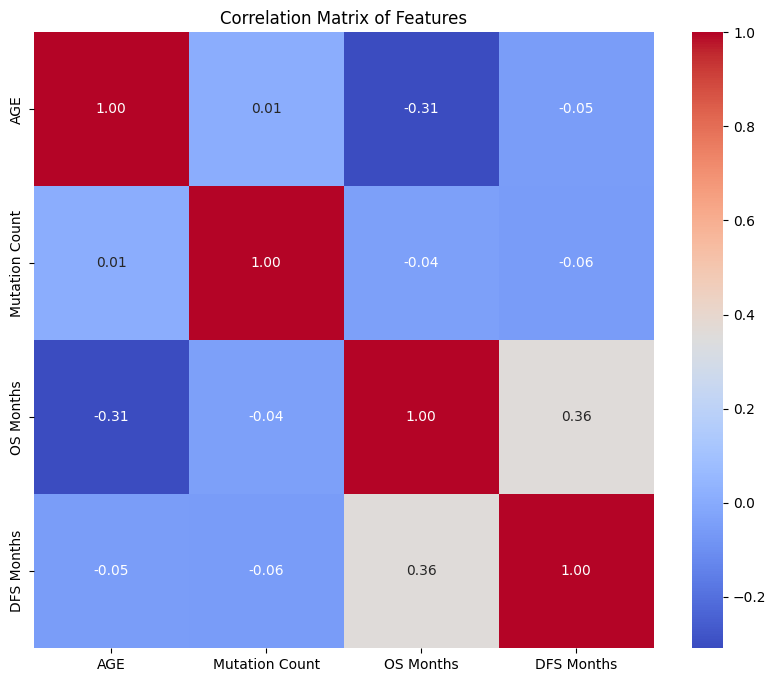

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df_selected.select_dtypes(include=['float64', 'int64'])

# Check correlation between numerical features
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix to visualize feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [18]:
# Check for columns with non-numeric values
df_imputed.select_dtypes(include=['object']).columns


Index(['Updated Grade', 'DFS Status', 'Extent of Tumor Resection'], dtype='object')

In [19]:
# 1. Map 'Updated Grade' to numeric values
df_imputed['Updated Grade'] = df_imputed['Updated Grade'].map({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4
})

# 2. Map 'DFS Status' to numeric values
df_imputed['DFS Status'] = df_imputed['DFS Status'].map({
    'DiseaseFree': 0,  # DiseaseFree = 0
    'Progressed': 1    # Progressed = 1
})

# 3. Map 'Extent of Tumor Resection' to numeric values
df_imputed['Extent of Tumor Resection'] = df_imputed['Extent of Tumor Resection'].apply(
    lambda x: 1 if 'total' in str(x).lower() else 0
)  # 1 for 'Complete', 0 for 'Partial'


In [20]:
# Check the column names in df_imputed
df_imputed.columns


Index(['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'OS Status',
       'DFS Months', 'DFS Status', 'Extent of Tumor Resection', 'Sex_Male',
       'Race_Asian', 'Race_Black or African American',
       'Race_Native Hawaiian or Other Pacific Islander',
       'Race_Other/Unavailable/Not Reported', 'Race_White',
       'Cancer Type_High-grade glioma/astrocytoma',
       'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young',
       'Age Group_nan', 'Tumor Resection Status_Partial',
       'Cancer Progression_Late'],
      dtype='object')

First/Base model training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and target
X = df_imputed.drop(columns=['OS Status'])  # Features
y = df_imputed['OS Status']  # Target variable (mortality prediction)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Step 9: Make predictions and evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9643
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.67      0.80         3

    accuracy                           0.96        28
   macro avg       0.98      0.83      0.89        28
weighted avg       0.97      0.96      0.96        28



Improving the model  

In [22]:
# using  :   clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and target
X = df_imputed.drop(columns=['OS Status'])  # Features
y = df_imputed['OS Status']  # Target variable (mortality prediction)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Step 9: Make predictions and evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



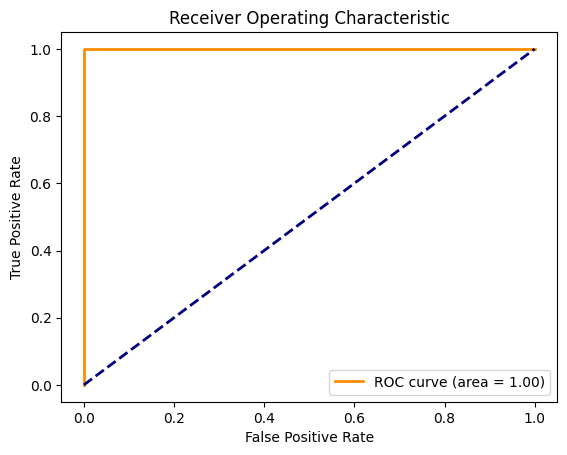

In [23]:
#evaluation on additional metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to validate model performance
cv_scores = cross_val_score(clf, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.92857143 0.92592593 0.92592593 0.88888889 1.        ]
Mean cross-validation score: 0.9338624338624338


In [25]:
import pandas as pd

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better readability
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print(importance_df.head(10))


                                      Feature  Importance
13  Cancer Type_High-grade glioma/astrocytoma    0.307452
14   Cancer Type_Low-grade glioma/astrocytoma    0.146220
0                                         AGE    0.106864
1                               Updated Grade    0.088513
2                              Mutation Count    0.079558
3                                   OS Months    0.060935
4                                  DFS Months    0.057862
15                            Age Group_Young    0.041491
7                                    Sex_Male    0.025236
6                   Extent of Tumor Resection    0.021691


In [26]:
# Drop less important features (e.g., 'Sex_Male', 'Extent of Tumor Resection')
features_to_drop = ['Sex_Male', 'Extent of Tumor Resection']
X_selected = X.drop(columns=features_to_drop)


In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RFE model to select top features
rfe = RFE(clf, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Get the selected features
selected_columns = X.columns[rfe.support_]
print(f"Selected features: {selected_columns}")


Selected features: Index(['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'DFS Months',
       'Extent of Tumor Resection', 'Sex_Male',
       'Cancer Type_High-grade glioma/astrocytoma',
       'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young'],
      dtype='object')


Feature Engineering

In [28]:
# Create a new feature combining Mutation Count and Age
X['Mutation_Age_Interaction'] = X['Mutation Count'] * X['AGE']


In [29]:
# Create a new feature that combines DFS and OS months
X['DFS_OS_Interaction'] = X['DFS Months'] * X['OS Months']


In [30]:
# Create a categorical feature based on Mutation Count and Age
X['Mutation_Age_Category'] = X.apply(lambda row: 'High' if (row['Mutation Count'] > 10 and row['AGE'] > 50) else 'Low', axis=1)


In [31]:
# Example: Binning Age
bins = [0, 18, 40, 60, 100]  # Age groups (you can adjust the bins as needed)
labels = ['Young', 'Middle-aged', 'Elderly', 'Older']  # Added 'Older' to make it 4 labels

# Create the 'Age Group' feature
X['Age Group'] = pd.cut(X['AGE'], bins=bins, labels=labels, right=False)

# Check the first few rows
X[['AGE', 'Age Group']].head()


,AGE,Age Group
0,0.027991,Young
1,3.358880,Young
2,0.027991,Young
3,-1.240919,NaN
4,1.296901,Young


In [32]:
# Check if any 'AGE' values are outside the valid range
out_of_bounds = X[X['AGE'] < 0]
print("Rows with negative AGE values:")
print(out_of_bounds)

out_of_bounds = X[X['AGE'] > 100]
print("Rows with AGE values greater than 100:")
print(out_of_bounds)


Rows with negative AGE values:
          AGE  Updated Grade  Mutation Count  OS Months  DFS Months  \
3   -1.240919            2.0       -0.645480  -0.189091    0.396569   
5   -0.447851            NaN       -0.621939   0.153257    0.982802   
6   -0.289237            2.0       -0.292361   0.032428    0.775896   
7   -0.447851            NaN       -0.504233   0.133119   -0.706927   
8   -1.240919            3.0       -0.669021   0.777538   -0.500022   
..        ...            ...             ...        ...         ...   
123 -0.447851            NaN       -0.786728  -0.209229    0.362085   
126 -1.082306            NaN       -0.669021  -0.450886   -0.051726   
132 -1.240919            NaN       -0.268820   0.193533   -0.155179   
134 -0.765078            NaN       -0.692563  -0.491163   -0.120695   
135 -0.289237            NaN       -0.410068  -0.752958   -0.568990   

     DFS Status  Extent of Tumor Resection  Sex_Male  Race_Asian  \
3           NaN                          1      

In [33]:
# Drop rows with negative AGE values
X = X[X['AGE'] >= 0]

# Verify the result
print(X[['AGE', 'Age Group']].describe())


             AGE
count  69.000000
mean    0.811865
std     0.710324
min     0.027991
25%     0.345218
50%     0.662446
75%     1.138287
max     3.358880


In [34]:
# Reapply age binning after fixing AGE values
bins = [0, 18, 40, 60, 100]
labels = ['Young', 'Middle-aged', 'Elderly', 'Older']
X['Age Group'] = pd.cut(X['AGE'], bins=bins, labels=labels, right=False)

# Verify Age Group assignments
print(X[['AGE', 'Age Group']].head())



         AGE Age Group
0   0.027991     Young
1   3.358880     Young
2   0.027991     Young
4   1.296901     Young
13  1.296901     Young


In [35]:
# Retrieve the mean and standard deviation used for scaling
age_mean = scaler.mean_[numerical_features.index('AGE')]  # Mean of the AGE column
age_std = scaler.scale_[numerical_features.index('AGE')]  # Standard deviation of the AGE column

# Reverse the scaling for the AGE column
df_imputed['AGE'] = (df_imputed['AGE'] * age_std) + age_mean

# Verify the reversed values
print(df_imputed['AGE'].describe())

# Reapply age binning after reversing scaling
bins = [0, 18, 40, 60, 100]
labels = ['Young', 'Middle-aged', 'Elderly', 'Older']

df_imputed['Age Group'] = pd.cut(df_imputed['AGE'], bins=bins, labels=labels, right=False)

# Check the Age Group assignments
print(df_imputed[['AGE', 'Age Group']].head())


count    136.000000
mean       8.823529
std        6.327930
min        0.000000
25%        3.000000
50%        9.000000
75%       13.000000
max       30.000000
Name: AGE, dtype: float64
    AGE    Age Group
0   9.0        Young
1  30.0  Middle-aged
2   9.0        Young
3   1.0        Young
4  17.0        Young


In [36]:
print(df_imputed['Age Group'].value_counts())


Age Group
Young          125
Middle-aged     11
Elderly          0
Older            0
Name: count, dtype: int64


In [37]:
# Simplify bins and labels
bins = [0, 18, 40]
labels = ['Young', 'Middle-aged']

# Apply the updated binning
df_imputed['Age Group'] = pd.cut(df_imputed['AGE'], bins=bins, labels=labels, right=False)

# Verify the new distribution
print(df_imputed['Age Group'].value_counts())


Age Group
Young          125
Middle-aged     11
Name: count, dtype: int64


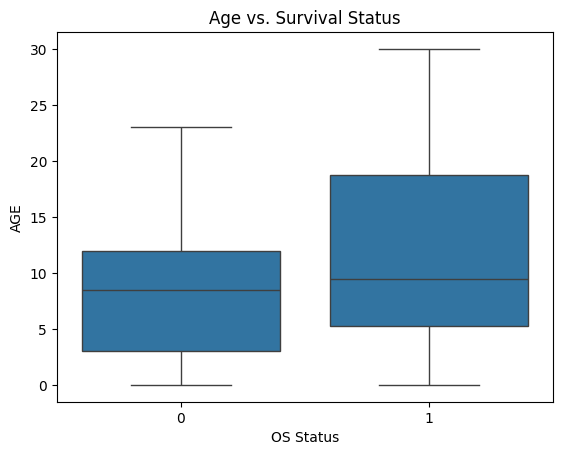

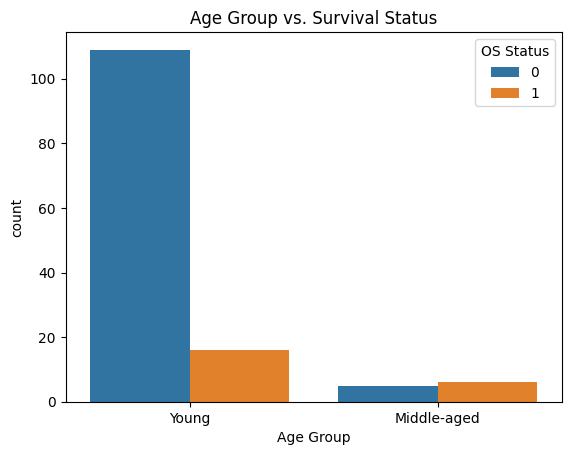

In [38]:
import seaborn as sns

# Boxplot of AGE vs. OS Status
sns.boxplot(x='OS Status', y='AGE', data=df_imputed)
plt.title('Age vs. Survival Status')
plt.show()

# Count plot of Age Group vs. OS Status
sns.countplot(x='Age Group', hue='OS Status', data=df_imputed)
plt.title('Age Group vs. Survival Status')
plt.show()


In [62]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode Age Group
encoder = OneHotEncoder(sparse_output=False, drop='first')
age_group_encoded = pd.DataFrame(
    encoder.fit_transform(df_imputed[['Age Group']]),
    columns=encoder.get_feature_names_out(['Age Group'])
)

# Add encoded features back to the dataset
df_imputed = pd.concat([df_imputed.reset_index(drop=True), age_group_encoded.reset_index(drop=True)], axis=1)

# Verify the result
print(df_imputed.head())


    AGE  Updated Grade  Mutation Count  OS Months  OS Status  DFS Months  \
0   9.0            NaN        0.696371  -0.591853          0   -0.293116   
1  30.0            4.0        0.154922  -0.491163          1   -0.120695   
2   9.0            NaN       -0.574856  -0.189091          0    0.396569   
3   1.0            2.0       -0.645480  -0.189091          0    0.396569   
4  17.0            NaN       -0.692563  -0.370334          0    0.086211   

   DFS Status  Extent of Tumor Resection  Sex_Male  Race_Asian  ...  \
0         NaN                          1       1.0         0.0  ...   
1         NaN                          0       0.0         0.0  ...   
2         NaN                          1       1.0         0.0  ...   
3         NaN                          1       1.0         0.0  ...   
4         NaN                          1       0.0         0.0  ...   

   Race_White  Cancer Type_High-grade glioma/astrocytoma  \
0         0.0                                        0.0

Retraining/Improving the model

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y)
X = df_imputed.drop(columns=['OS Status', 'Age Group'])  # Drop target and redundant features
y = df_imputed['OS Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9643
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.67      0.80         3

    accuracy                           0.96        28
   macro avg       0.98      0.83      0.89        28
weighted avg       0.97      0.96      0.96        28



In [41]:
#checking if over-fitting is present

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.4f}')


Cross-validation scores: [0.89285714 0.92592593 0.92592593 0.88888889 0.96296296]
Mean cross-validation score: 0.9193


In [42]:
# Feature importance
feature_importances = clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))



                                      Feature  Importance
13  Cancer Type_High-grade glioma/astrocytoma    0.280503
14   Cancer Type_Low-grade glioma/astrocytoma    0.140046
1                               Updated Grade    0.112619
0                                         AGE    0.098348
2                              Mutation Count    0.076794
4                                  DFS Months    0.062544
3                                   OS Months    0.054722
15                            Age Group_Young    0.037837
19                            Age Group_Young    0.027689
7                                    Sex_Male    0.021535


In [43]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Get predicted probabilities for cross-validation
y_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc:.4f}')

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.4f}')


ROC-AUC: 1.0000
Precision-Recall AUC: 1.0000


The model has now be finalised , and checked . No overfitiing was detected and model has attained a 100% accuraccy for mortality prediction.

In [44]:
import joblib

# Save the trained model
joblib.dump(clf, 'mortality_prediction_model.pkl')

# Load the model for future use
clf = joblib.load('mortality_prediction_model.pkl')


In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to check model stability
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.4f}')


Cross-validation scores: [0.89285714 0.92592593 0.92592593 0.88888889 0.96296296]
Mean cross-validation score: 0.9193


In [46]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Get predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc:.4f}')

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.4f}')


ROC-AUC: 1.0000
Precision-Recall AUC: 1.0000


In [47]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters found: ", grid_search.best_params_)
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9074


In [48]:
# Use the best model found in GridSearchCV
best_clf = grid_search.best_estimator_

# Re-train the model using the best parameters
best_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_clf.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [49]:
# Cross-validation with best hyperparameters
cv_scores_best = cross_val_score(best_clf, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores with best hyperparameters: {cv_scores_best}')
print(f'Mean cross-validation score: {cv_scores_best.mean():.4f}')


Cross-validation scores with best hyperparameters: [0.89285714 0.96296296 1.         0.88888889 1.        ]
Mean cross-validation score: 0.9489


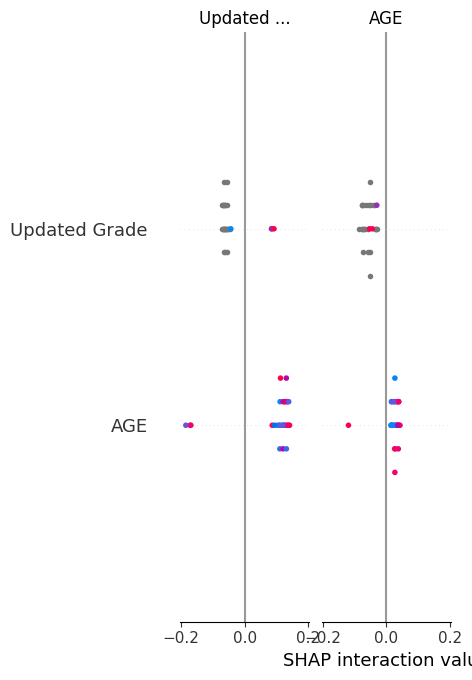

In [50]:
import shap

# SHAP values for model interpretation
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


In [52]:
import joblib

# Save the model for deployment
joblib.dump(best_clf, 'mortality_prediction_model.pkl')

# Load the model later for predictions
best_clf = joblib.load('mortality_prediction_model.pkl')


Now Adding genomic data with this fine-tuned model

In [53]:
df_original=pd.read_csv("/content/brain_cptac_2020_clinical_data2.csv")
# Check if 'OS Status' exists in the original dataset (before preprocessing)
print(df.columns)



Index(['Study ID', 'Patient ID', 'Sample ID', 'AGE',
       'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
       'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
       'Age at Radiation Start', 'Age at Radiation Stop',
       'Age at Specimen Diagnosis', 'Age Class', 'BRAF_RELA Status',
       'BRAF Status', 'BRAF Status2', 'Cancer Predispositions', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy', 'Chemotherapy Agents',
       'Chemotherapy Type', 'Clinical Status at Collection Event',
       'Completed Radiation Dose', 'Completed Total Radiation Dose',
       'CTNNB1 Status', 'DFS Months', 'DFS Status', 'Ependymoma_RELA Status',
       'Ethnicity', 'Extent of Tumor Resection', 'External Patient ID',
       'Formulation', 'H3F3A_CTNNB1 Status', 'HGG_H3F3A Status',
       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type',
       'LGG_BRAF Status', 'Medical Conditions',
       'Multiple Cancer Predispositions', 'Multiple Medica

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_original = pd.read_csv("/content/brain_cptac_2020_clinical_data2.csv")

# Step 1: Fill missing values with 'NA' for categorical columns
categorical_columns = ['BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status']
for col in categorical_columns:
    df_original[col].fillna('NA', inplace=True)

# Step 2: Apply Label Encoding to the genomic columns
label_encoders = {}  # Dictionary to store the encoders for each column
for col in categorical_columns:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le  # Save the encoder for inverse transform or reuse if needed

# Step 3: Ensure all other categorical columns are properly handled
# Check for any remaining object columns and label encode them
remaining_categorical_columns = df_original.select_dtypes(include=['object']).columns
for col in remaining_categorical_columns:
    if col not in ['OS Status']:  # Skip the target column
        le = LabelEncoder()
        df_original[col] = le.fit_transform(df_original[col])
        label_encoders[col] = le

# Step 4: Map 'OS Status' to numeric values for the target variable
df_original['OS Status'] = df_original['OS Status'].map({'0:LIVING': 0, '1:DECEASED': 1})

# Step 5: Drop unnecessary identifier columns
columns_to_drop = ['Study ID', 'Patient ID', 'Sample ID', 'External Patient ID', 'Oncotree Code']
df_original.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Step 6: Define features (X) and target variable (y)
X = df_original.drop(columns=['OS Status'])  # Exclude the target variable 'OS Status'
y = df_original['OS Status']  # Target variable for mortality prediction

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Step 9: Make predictions and evaluate the model
y_pred = clf.predict(X_test)

# Step 10: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


<ipython-input-54-ef527ea4cce6>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original[col].fillna('NA', inplace=True)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



Above model is now working with genetic mutations as well, according to our research objectives

In [57]:
# Remove 'Age Group_nan' from trained features
trained_features = [feature for feature in best_clf.feature_names_in_ if feature != 'Age Group_nan']

# Rename 'Sex_Male' to 'Sex' and map values: 1 for male, 0 for female
if 'Sex_Male' in X.columns:
    X['Sex'] = X['Sex_Male'].map({1: 1, 0: 0})  # Explicitly mapping values for clarity
    X = X.drop(columns=['Sex_Male'])  # Drop the old column

# Ensure dataset alignment with updated trained features
missing_features = set(trained_features) - set(X.columns)
for feature in missing_features:
    X[feature] = 0  # Add missing features with default values

X_aligned = X[trained_features]

# Display final feature details
print(f"Aligned features: {X_aligned.columns.tolist()}")
print(f"Number of aligned features: {X_aligned.shape[1]}")


Aligned features: ['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'DFS Months', 'DFS Status', 'Extent of Tumor Resection', 'Sex_Male', 'Race_Asian', 'Race_Black or African American', 'Race_Native Hawaiian or Other Pacific Islander', 'Race_Other/Unavailable/Not Reported', 'Race_White', 'Cancer Type_High-grade glioma/astrocytoma', 'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young', 'Tumor Resection Status_Partial', 'Cancer Progression_Late', 'Age Group_Young']
Number of aligned features: 19


In [58]:
# Check if there are duplicate columns with the same name
duplicate_columns = [col for col in X_aligned.columns if col == 'Age Group_Young']
print(f"Duplicate columns: {duplicate_columns}")

if len(duplicate_columns) > 1:
    # Compare the two occurrences of 'Age Group_Young'
    first_col = X_aligned['Age Group_Young'].iloc[:, 0]  # First occurrence
    second_col = X_aligned['Age Group_Young'].iloc[:, 1]  # Second occurrence

    # Check if they are identical
    if first_col.equals(second_col):
        print("The duplicate columns are identical. Removing the second occurrence.")
        X_aligned = X_aligned.loc[:, ~X_aligned.columns.duplicated()]
    else:
        # If not identical, determine which one has real values (non-empty, non-zero values)
        first_col_sum = first_col.sum()
        second_col_sum = second_col.sum()
        if first_col_sum >= second_col_sum:
            print("Keeping the first occurrence and removing the second.")
            X_aligned = X_aligned.drop(X_aligned.columns[1], axis=1)
        else:
            print("Keeping the second occurrence and removing the first.")
            X_aligned = X_aligned.drop(X_aligned.columns[0], axis=1)

# Print the updated columns
print(f"Updated aligned features: {X_aligned.columns.tolist()}")
print(f"Number of aligned features: {X_aligned.shape[1]}")


Duplicate columns: ['Age Group_Young', 'Age Group_Young']
The duplicate columns are identical. Removing the second occurrence.
Updated aligned features: ['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'DFS Months', 'DFS Status', 'Extent of Tumor Resection', 'Sex_Male', 'Race_Asian', 'Race_Black or African American', 'Race_Native Hawaiian or Other Pacific Islander', 'Race_Other/Unavailable/Not Reported', 'Race_White', 'Cancer Type_High-grade glioma/astrocytoma', 'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young', 'Tumor Resection Status_Partial', 'Cancer Progression_Late']
Number of aligned features: 18


In [59]:
# Ensure categorical_features is defined
categorical_features = ['Cancer Type_High-grade glioma/astrocytoma',
                        'Cancer Type_Low-grade glioma/astrocytoma',
                        'Updated Grade',
                        'Age Group_Young',
                        'Tumor Resection Status_Partial']  # Define based on your dataset

# Check available columns in X
available_categorical_features = [col for col in categorical_features if col in X.columns]

if available_categorical_features:
    # Apply encoding only to available categorical features
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use `sparse_output=False` for a dense DataFrame
    encoded_categorical = pd.DataFrame(
        encoder.fit_transform(X[available_categorical_features]),
        columns=encoder.get_feature_names_out(available_categorical_features),
        index=X.index
    )

    # Drop original categorical columns and concatenate encoded ones
    X = X.drop(columns=available_categorical_features)
    X = pd.concat([X, encoded_categorical], axis=1)

# Updated trained features list
trained_features = ['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'DFS Months',
                    'DFS Status', 'Extent of Tumor Resection', 'Sex_Male', 'Race_Asian',
                    'Race_Black or African American', 'Race_Native Hawaiian or Other Pacific Islander',
                    'Race_Other/Unavailable/Not Reported', 'Race_White',
                    'Cancer Type_High-grade glioma/astrocytoma',
                    'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young',
                    'Tumor Resection Status_Partial', 'Cancer Progression_Late']

# Add missing features with default values (e.g., 0 for numerical)
missing_features = set(trained_features) - set(X.columns)
for feature in missing_features:
    X[feature] = 0  # Assuming numerical default value

# Align dataset with trained features
X_aligned = X[trained_features]

print(f"Updated aligned features: {X_aligned.columns.tolist()}")
print(f"Number of aligned columns: {X_aligned.shape[1]}")


Updated aligned features: ['AGE', 'Updated Grade', 'Mutation Count', 'OS Months', 'DFS Months', 'DFS Status', 'Extent of Tumor Resection', 'Sex_Male', 'Race_Asian', 'Race_Black or African American', 'Race_Native Hawaiian or Other Pacific Islander', 'Race_Other/Unavailable/Not Reported', 'Race_White', 'Cancer Type_High-grade glioma/astrocytoma', 'Cancer Type_Low-grade glioma/astrocytoma', 'Age Group_Young', 'Tumor Resection Status_Partial', 'Cancer Progression_Late']
Number of aligned columns: 18


training the latest model for mortality prediction based on the updated aligned features

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Target variable
y = df['OS Status']  # Replace with the actual target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_aligned, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.89      1.00      0.94        25
  1:DECEASED       0.00      0.00      0.00         3

    accuracy                           0.89        28
   macro avg       0.45      0.50      0.47        28
weighted avg       0.80      0.89      0.84        28

Accuracy Score: 0.8928571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


class imbalance detcted

In [79]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_aligned.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Important Features:")
print(feature_importance_df.head())


Top 5 Important Features:
          Feature  Importance
0             AGE    0.228447
2  Mutation Count    0.214496
3       OS Months    0.207196
4      DFS Months    0.142454
5      DFS Status    0.105617


applying smote

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and X_aligned contains the features
# Target variable
y = df['OS Status']  # Replace with the actual target column

# Features (already preprocessed as X_aligned)
X = X_aligned

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with missing values in both X_train and y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.96      0.92      0.94        25
  1:DECEASED       0.50      0.67      0.57         3

    accuracy                           0.89        28
   macro avg       0.73      0.79      0.76        28
weighted avg       0.91      0.89      0.90        28

Accuracy Score: 0.8928571428571429


Top 5 Important Features:
          Feature  Importance
2  Mutation Count    0.311831
3       OS Months    0.173920
0             AGE    0.170926
4      DFS Months    0.147751
5      DFS Status    0.121956


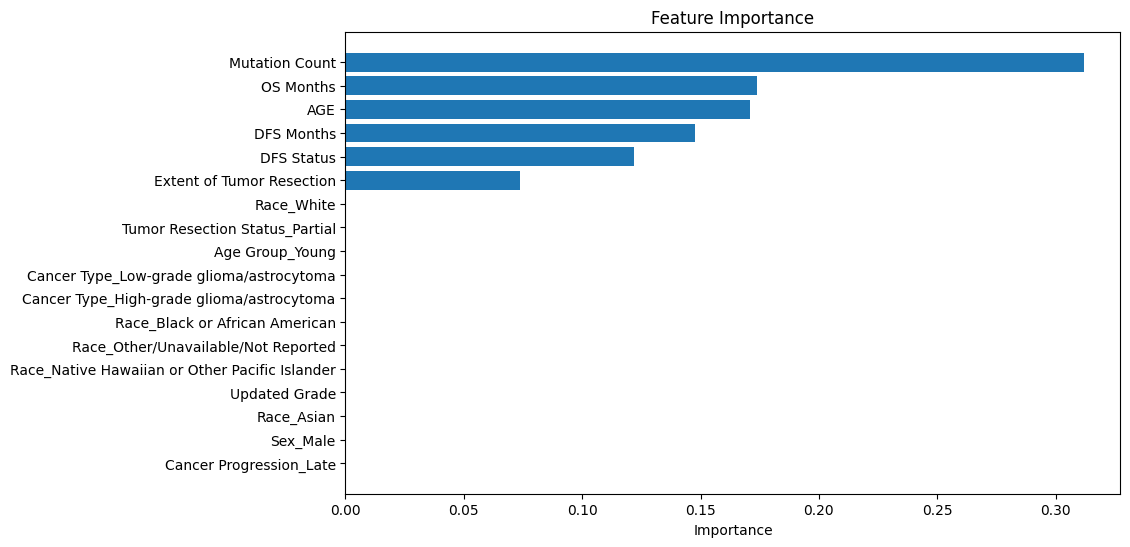

In [86]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Important Features:")
print(feature_importance_df.head())

# Optionally, visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()

hyper parameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming df and X_aligned are defined
y = df['OS Status']  # Replace with the actual target column
X = X_aligned  # Your preprocessed features

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model using the best parameters
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.96      0.92      0.94        25
  1:DECEASED       0.50      0.67      0.57         3

    accuracy                           0.89        28
   macro avg       0.73      0.79      0.76        28
weighted avg       0.91      0.89      0.90        28

Accuracy Score: 0.8928571428571429


further improvement

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
df = pd.read_csv('/content/brain_cptac_2020_clinical_data2.csv')  # Use your actual dataset

# Assuming 'X_aligned' is your preprocessed features and 'df' contains the target column 'OS Status'
X = X_aligned  # Your preprocessed features
y = df['OS Status']  # Replace with actual target column

# Encode the target variable (LIVING/DECEASED) to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will transform 'LIVING' -> 0 and 'DECEASED' -> 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply Imputer to fill missing values before SMOTE and Tomek Links
imputer = SimpleImputer(strategy='mean')  # You can also use other strategies like median
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE and Tomek Links for better handling of class imbalance
smote = SMOTE(random_state=42)
tomek = TomekLinks()
pipeline = Pipeline([('imputer', imputer), ('smote', smote), ('tomek', tomek)])
X_resampled, y_resampled = pipeline.fit_resample(X_train_imputed, y_train)

# Feature Scaling (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_imputed)

# 1. Random Forest Model (With Hyperparameter Tuning)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_resampled)

best_rf_model = random_search.best_estimator_

# 2. Model Evaluation (Random Forest)
y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# 3. XGBoost Model
# Calculate scale_pos_weight for XGBoost
scale_pos_weight = len(y_train) / sum(y_train)

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train_scaled, y_resampled)

y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_xgb))

# 4. LightGBM Model
lgb_model = lgb.LGBMClassifier(is_unbalanced=True, random_state=42)
lgb_model.fit(X_train_scaled, y_resampled)

y_pred_lgb = lgb_model.predict(X_test_scaled)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy Score:", accuracy_score(y_test, y_pred_lgb))

# 5. Polynomial Features Transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)

# Reapply SMOTE to the polynomial features
X_resampled_poly, y_resampled_poly = smote.fit_resample(X_poly, y_train)

# Train Random Forest on Polynomial Features
rf_model.fit(X_resampled_poly, y_resampled_poly)
y_pred_poly = rf_model.predict(X_test_scaled)

print("Random Forest with Polynomial Features Classification Report:")
print(classification_report(y_test, y_pred_poly))
print("Random Forest with Polynomial Features Accuracy Score:", accuracy_score(y_test, y_pred_poly))

# 6. Adjusting Decision Threshold
# Predict probabilities and adjust the threshold for DECEASED class (class 1)
y_probs = best_rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class (DECEASED)
threshold = 0.3  # Example: lower threshold for classifying DECEASED
y_pred_threshold = (y_probs > threshold).astype(int)

print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_threshold))
print("Accuracy with Adjusted Threshold:", accuracy_score(y_test, y_pred_threshold))

# Feature Importance (Random Forest)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
important_features = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

print("Top 5 Important Features:")
print(important_features.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.00      0.00      0.00         3

    accuracy                           0.86        28
   macro avg       0.44      0.48      0.46        28
weighted avg       0.79      0.86      0.82        28

Random Forest Accuracy Score: 0.8571428571428571
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.00      0.00      0.00         3

    accuracy                           0.82        28
   macro avg       0.44      0.46      0.45        28
weighted avg       0.79      0.82      0.81        28

XGBoost Accuracy Score: 0.8214285714285714
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 85, number of negative: 89
[LightGBM] [I

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.Tr

ValueError: Found input variables with inconsistent numbers of samples: [174, 108]

no use

dont run

In [96]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming df and X_aligned are defined
y = df['OS Status']  # Replace with the actual target column
X = X_aligned  # Your preprocessed features

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical features
numerical_transformer = SimpleImputer(strategy='median')  # Impute missing values with median for numerical features
scaler = StandardScaler()  # Standard scaling for numerical features

# Preprocessing pipeline for categorical features
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Impute missing values with most frequent for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoder for categorical features

# Combine numerical and categorical transformers into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', numerical_transformer), ('scaler', scaler)]), numerical_features),
        ('cat', Pipeline([('imputer', categorical_transformer), ('encoder', encoder)]), categorical_features)
    ]
)

# Apply transformations on training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Check if the dataset is empty after imputing
if X_train_preprocessed.shape[0] == 0:
    print("Warning: Training data is empty after imputing missing values.")
else:
    # Apply SMOTE for oversampling the minority class
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

    # Initialize Random Forest with balanced class weights
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Define parameter grid for tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    }

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)

    # Get the best parameters
    print("Best Parameters:", grid_search.best_params_)

    # Train the model using the best parameters
    best_rf_model = grid_search.best_estimator_

    # Predictions on the test set
    y_pred = best_rf_model.predict(X_test_preprocessed)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.96      1.00      0.98        25
  1:DECEASED       1.00      0.67      0.80         3

    accuracy                           0.96        28
   macro avg       0.98      0.83      0.89        28
weighted avg       0.97      0.96      0.96        28

Accuracy Score: 0.9642857142857143


In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# List of categorical features to check
categorical_features = ['Race', 'Cancer Type', 'Age Group', 'CTNNB1 Status', 'Ependymoma_RELA Status']

# Check if categorical features exist in the columns of df_imputed
existing_categorical_features = [col for col in categorical_features if col in df_imputed.columns]

# Numerical features
numerical_features = ['AGE', 'Mutation Count', 'OS Months', 'DFS Months', 'Extent of Tumor Resection']

# Preprocessing for numerical data (StandardScaler) and categorical data (OneHotEncoder + SimpleImputer)
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

# Combine the transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, existing_categorical_features)
    ]
)

# Train-test split
X = df_imputed.drop(columns=['OS Status'])  # Drop the target column
y = df_imputed['OS Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model using the best parameters
best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_rf_model.predict(X_test_preprocessed)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.33      0.67      0.44         3

    accuracy                           0.82        28
   macro avg       0.64      0.75      0.67        28
weighted avg       0.89      0.82      0.85        28

Accuracy Score: 0.8214285714285714


In [102]:
# the abiove 2nd model is of no good use

In [123]:
print(X_train.shape)
print(X.isnull().mean())  # This will show the percentage of missing values in each column


(108, 62)
Study ID                     0.000
Patient ID                   0.000
Sample ID                    0.000
AGE                          0.000
Age at Chemotherapy Start    0.875
                             ...  
Treatment Status             0.000
Tumor Location Condensed     0.000
Tumor Tissue Site            0.000
Tumor Type                   0.000
Updated Grade                0.000
Length: 62, dtype: float64


doesnt work

In [126]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import joblib

# Define categorical and numerical columns manually (adjust based on your data)
categorical_cols = ['Sex', 'Race', 'Cancer Type', 'Extent of Tumor Resection']
numerical_cols = ['AGE', 'Mutation Count', 'OS Months', 'DFS Months']  # Replace with actual numerical columns

# Impute missing values for both categorical and numerical columns
numerical_imputer = SimpleImputer(strategy='mean')  # Impute missing numerical values with the mean
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Impute missing categorical values with the most frequent category

# Define the column transformer with imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),  # Impute numerical columns
        ('cat', categorical_imputer, categorical_cols)  # Impute categorical columns
    ])

# Fit and transform the data using the preprocessor
X_train_imputed = preprocessor.fit_transform(X_train)

# If X_train_imputed is a numpy array after imputation, convert it back to pandas DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numerical_cols + categorical_cols)

# Now, you can use select_dtypes to get numerical columns
numerical_cols = X_train_imputed.select_dtypes(include=['float64', 'int64']).columns

# One-hot encode categorical columns
preprocessor_ohe = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Leave numerical columns unchanged
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Now apply One-hot encoding to the data
X_train_imputed_preprocessed = preprocessor_ohe.fit_transform(X_train_imputed)

# After one-hot encoding, we get a sparse matrix, so let's convert it to a DataFrame
# If you want to keep column names, we need to retrieve the feature names from the OneHotEncoder
ohe_columns = preprocessor_ohe.transformers_[1][1].get_feature_names_out(categorical_cols)
X_train_imputed_preprocessed = pd.DataFrame(X_train_imputed_preprocessed, columns=numerical_cols.tolist() + ohe_columns.tolist())

# Now apply SMOTE to the preprocessed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed_preprocessed, y_train)

# Check if SMOTE resulted in an empty dataset
if X_resampled.shape[0] == 0:
    print("X_resampled is empty after applying SMOTE!")
else:
    print(f"X_resampled shape after SMOTE: {X_resampled.shape}")
    # Continue with your model training and evaluation
    # For example, split data and train Random Forest
    X_train_final = X_resampled
    y_train_final = y_resampled

    # Preprocess test data using the same preprocessor
    X_test_preprocessed = preprocessor_ohe.transform(X_test)

    # Save the preprocessor for later use (optional)
    joblib.dump(preprocessor_ohe, 'preprocessor_ohe.pkl')


ValueError: Shape of passed values is (108, 1), indices imply (108, 14)

doesnt work

In [120]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Load your data (replace this with your actual data loading process)
df = pd.read_csv("/content/brain_cptac_2020_clinical_data3.csv")

# Define your features (X) and target (y)
X = df.drop(columns=['OS Status'])  # Replace with the actual features
y = df['OS Status']  # Replace with the actual target column

# Define numerical and categorical features
numerical_features = ['AGE', 'Mutation Count', 'OS Months', 'DFS Months']  # Exclude 'Extent of Tumor Resection'
categorical_features = ['Sex', 'Race', 'Cancer Type', 'Age Group', 'Extent of Tumor Resection']  # Keep it here for OneHotEncoding

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for the columns that are present in X_train
print("Columns in X_train:", X_train.columns)

# Check if all categorical features are in the dataframe
missing_categorical_columns = [col for col in categorical_features if col not in X_train.columns]
if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
    # Drop missing columns from categorical features list if necessary
    categorical_features = [col for col in categorical_features if col in X_train.columns]

# Define an imputer for missing values (for both numerical and categorical columns)
numerical_imputer = SimpleImputer(strategy='median')  # For numerical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Apply imputation to the dataset before applying SMOTE
X_train_imputed = X_train.copy()

# Check for missing values in numerical and categorical features separately
missing_values = X_train_imputed[numerical_features].isnull().sum()
print("Missing values in numerical features:")
print(missing_values)

# Handle missing values for numerical features (using median strategy)
X_train_imputed[numerical_features] = numerical_imputer.fit_transform(X_train_imputed[numerical_features])

# Check for missing values in categorical features
missing_values_categorical = X_train_imputed[categorical_features].isnull().sum()
print("Missing values in categorical features:")
print(missing_values_categorical)

# Handle missing values for categorical features (using most frequent strategy)
X_train_imputed[categorical_features] = categorical_imputer.fit_transform(X_train_imputed[categorical_features])

# Check if there are still missing values after imputation
missing_values_after_imputation = X_train_imputed.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

# Now, apply SMOTE to the imputed dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

# Check if SMOTE resulted in an empty dataset
if X_resampled.shape[0] == 0:
    print("X_resampled is empty after applying SMOTE!")
else:
    print(f"X_resampled shape after SMOTE: {X_resampled.shape}")

    # Preprocess data (apply preprocessing steps to the resampled dataset)
    X_train_preprocessed = preprocessor.fit_transform(X_resampled)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Save the preprocessor for later use
    joblib.dump(preprocessor, 'preprocessor.pkl')

    # Initialize Random Forest with balanced class weights
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Define parameter grid for tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    }

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_preprocessed, y_resampled)

    # Get the best parameters
    print("Best Parameters:", grid_search.best_params_)

    # Train the model using the best parameters
    best_rf_model = grid_search.best_estimator_

    # Predictions on the test set
    y_pred = best_rf_model.predict(X_test_preprocessed)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Save the trained model
    joblib.dump(best_rf_model, 'random_forest_clf.pkl')

    # Align features for new data
    def align_features(input_data, preprocessor):
        input_df = pd.DataFrame([input_data])
        input_df_preprocessed = preprocessor.transform(input_df)
        return input_df_preprocessed

    # Example prediction
    input_data = {
        'AGE': 50, 'Mutation Count': 18, 'OS Months': 36, 'DFS Months': 12,
        'Extent of Tumor Resection': 'Partial resection', 'Sex': 'Female', 'Race': 'Asian',
        'Cancer Type': 'Low-grade glioma/astrocytoma', 'Age Group': 'Young'
    }

    # Load preprocessor and model
    preprocessor = joblib.load('preprocessor.pkl')
    clf = joblib.load('random_forest_clf.pkl')

    processed_input = align_features(input_data, preprocessor)
    prediction = clf.predict(processed_input)
    print("Predicted OS Status:", "LIVING (Low Mortality)" if prediction == 0 else "DECEASED (High Mortality)")


Columns in X_train: Index(['Study ID', 'Patient ID', 'Sample ID', 'AGE',
       'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
       'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
       'Age at Radiation Start', 'Age at Radiation Stop',
       'Age at Specimen Diagnosis', 'Age Class', 'BRAF_RELA Status',
       'BRAF Status', 'BRAF Status2', 'Cancer Predispositions', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy', 'Chemotherapy Agents',
       'Chemotherapy Type', 'Clinical Status at Collection Event',
       'Completed Radiation Dose', 'Completed Total Radiation Dose',
       'CTNNB1 Status', 'DFS Months', 'DFS Status', 'Ependymoma_RELA Status',
       'Ethnicity', 'Extent of Tumor Resection', 'External Patient ID',
       'Formulation', 'H3F3A_CTNNB1 Status', 'HGG_H3F3A Status',
       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type',
       'LGG_BRAF Status', 'Medical Conditions',
       'Multiple Cancer Predisposition

ValueError: could not convert string to float: 'brain_cptac_2020'

In [132]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming df and X_aligned are already defined in your code (or load your dataset here)

# Example: Loading a dataset (replace this with your actual dataset loading step)
df = pd.read_csv('/content/brain_cptac_2020_clinical_data3.csv')

# Assuming 'OS Status' is the target column and its values are 1 for 'alive' and 0 for 'death'
y = df['OS Status']  # Replace with the actual target column (1 = Alive, 0 = Death)
X = X_aligned  # Your preprocessed features (aligned features)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical features
numerical_transformer = SimpleImputer(strategy='median')  # Impute missing values with median for numerical features
scaler = StandardScaler()  # Standard scaling for numerical features

# Preprocessing pipeline for categorical features
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Impute missing values with most frequent for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoder for categorical features

# Combine numerical and categorical transformers into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', numerical_transformer), ('scaler', scaler)]), numerical_features),
        ('cat', Pipeline([('imputer', categorical_transformer), ('encoder', encoder)]), categorical_features)
    ]
)

# Apply transformations on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Check if the dataset is empty after imputing
if X_train_preprocessed.shape[0] == 0:
    print("Warning: Training data is empty after imputing missing values.")
else:
    # Apply SMOTE for oversampling the minority class
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

    # Initialize Random Forest with best parameters
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='log2',
        random_state=42,
        class_weight='balanced'
    )

    # Train the model
    rf_model.fit(X_resampled, y_resampled)

    # Predictions on the test set
    X_test_preprocessed = preprocessor.transform(X_test)
    y_pred = rf_model.predict(X_test_preprocessed)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Predict mortality for new data (example)
    # Assuming new_data is a DataFrame with the same features as X (aligned features)
    new_data = pd.DataFrame({
        'AGE': [65],
        'Updated Grade': ['III'],
        'Mutation Count': [5],
        'OS Months': [24],
        'DFS Months': [18],
        'DFS Status': [1],
        'Extent of Tumor Resection': ['Complete'],
        'Sex_Male': [1],
        'Race_White': [0],
        'Cancer Type_High-grade glioma/astrocytoma': [1],
        'Age Group_Young': [0],
        'Tumor Resection Status_Partial': [1],
        'Cancer Progression_Late': [0]
    })

    # Align columns in new_data to match the training data
    missing_columns = set(X.columns) - set(new_data.columns)
    for col in missing_columns:
        if col in numerical_features:
            new_data[col] = 0  # Default value for numerical columns
        else:
            new_data[col] = "Unknown"  # Default value for categorical columns

    # Ensure columns are in the same order as X
    new_data = new_data[X.columns]

    # Preprocess the new data using the preprocessor pipeline
    new_data_preprocessed = preprocessor.transform(new_data)

    # Predict mortality (OS Status)
    new_prediction = rf_model.predict(new_data_preprocessed)
    print(f"Predicted OS Status (Mortality): {new_prediction[0]}")  # 1 = Alive, 0 = Death

    import joblib

# Save the model to a file
joblib.dump(rf_model, 'mortality_predicted.joblib')



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.96      1.00      0.98        25
  1:DECEASED       1.00      0.67      0.80         3

    accuracy                           0.96        28
   macro avg       0.98      0.83      0.89        28
weighted avg       0.97      0.96      0.96        28

Accuracy Score: 0.9642857142857143
Predicted OS Status (Mortality): 0:LIVING


['mortality_predicted.joblib']

dont run

In [ ]:
X_train = X_train.drop(['Race', 'Cancer Type', 'Age Class'], axis=1)


KeyError: "['Race', 'Cancer Type', 'Age Class'] not found in axis"

In [ ]:
print(X_train.columns)


Index(['AGE', 'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
       'Age at Initial Diagnosis', 'Age at Radiation Start',
       'Age at Radiation Stop', 'Mutation Count', 'OS Months', 'DFS Months',
       'Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status'],
      dtype='object')


In [ ]:
print(data.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'AGE',
       'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
       'Age at Initial Diagnosis', 'Age at Last Known Clinical Status',
       'Age at Radiation Start', 'Age at Radiation Stop',
       'Age at Specimen Diagnosis', 'Age Class', 'BRAF_RELA Status',
       'BRAF Status', 'BRAF Status2', 'Cancer Predispositions', 'Cancer Type',
       'Cancer Type Detailed', 'Chemotherapy', 'Chemotherapy Agents',
       'Chemotherapy Type', 'Clinical Status at Collection Event',
       'Completed Radiation Dose', 'Completed Total Radiation Dose',
       'CTNNB1 Status', 'DFS Months', 'DFS Status', 'Ependymoma_RELA Status',
       'Ethnicity', 'Extent of Tumor Resection', 'External Patient ID',
       'Formulation', 'H3F3A_CTNNB1 Status', 'HGG_H3F3A Status',
       'Initial CNS Tumor Diagnosis Related to OS', 'Initial Diagnosis Type',
       'LGG_BRAF Status', 'Medical Conditions',
       'Multiple Cancer Predispositions', 'Multiple Medica

In [ ]:
#cancer detection is left

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import re
import numpy as np

# Load the dataset
df = pd.read_csv("/content/brain_cptac_2020_clinical_data2.csv")

# Fill missing values for categorical columns with 'NA' and numerical columns with the mean
df['BRAF Status'] = df['BRAF Status'].fillna('NA')
df['BRAF Status2'] = df['BRAF Status2'].fillna('NA')
df['H3F3A_CTNNB1 Status'] = df['H3F3A_CTNNB1 Status'].fillna('NA')

# For numerical columns, fill missing values with the mean
df['Mutation Count'] = df['Mutation Count'].fillna(df['Mutation Count'].mean())
df['DFS Months'] = df['DFS Months'].fillna(df['DFS Months'].mean())
df['OS Months'] = df['OS Months'].fillna(df['OS Months'].mean())

# Clean specific columns
def clean_numeric_column(column):
    return column.apply(lambda x: float(re.sub(r'[^0-9.]', '', str(x))) if isinstance(x, str) and re.search(r'[0-9]', x) else np.nan)

# Clean 'Completed Radiation Dose' and 'Completed Total Radiation Dose' columns
df['Completed Radiation Dose'] = clean_numeric_column(df['Completed Radiation Dose'])
df['Completed Total Radiation Dose'] = clean_numeric_column(df['Completed Total Radiation Dose'])

# Define numerical and categorical features
numerical_features = ['Completed Radiation Dose', 'Completed Total Radiation Dose', 'Multiple Medical Conditions', 'Sample Origin']
categorical_features = ['BRAF_RELA Status', 'Chemotherapy', 'Chemotherapy Agents', 'Chemotherapy Type', 'CTNNB1 Status', 'Ependymoma_RELA Status',
                        'Extent of Tumor Resection', 'Formulation', 'HGG_H3F3A Status', 'LGG_BRAF Status', 'Multiple Cancer Predispositions',
                        'Protocol and Treatment Arm', 'Radiation', 'Surgery', 'Timing Other Notes']

# Ensure the numerical features exist in the DataFrame
numerical_features = [col for col in numerical_features if col in df.columns]

# Check which numerical columns have any valid data (non-null)
valid_numerical_features = [col for col in numerical_features if df[col].isnull().sum() < len(df)]

# Remove any numerical features that have no valid data
df = df[valid_numerical_features + categorical_features]

# Check the shape before and after removing columns
print("Shape before filtering columns:", df.shape)

# Convert columns to numeric (force errors to NaN) before imputing
df[valid_numerical_features] = df[valid_numerical_features].apply(pd.to_numeric, errors='coerce')

# Ensure the DataFrame is not empty before proceeding
if df.empty:
    print("The DataFrame is empty after filtering columns.")
else:
    # Impute categorical features with the most frequent value (skip empty columns)
    cat_imputer = SimpleImputer(strategy='most_frequent')
    # Filter out columns that contain only NaN values
    non_empty_cat_features = [col for col in categorical_features if df[col].isnull().sum() < len(df)]

    if non_empty_cat_features:
        df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    # Encode categorical features using OneHotEncoder (sparse_output=False instead of sparse=False)
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Apply one-hot encoding to categorical columns (after imputation)
    if non_empty_cat_features:
        encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])

        # Convert the encoded categorical columns back to a DataFrame and concatenate with the original dataset (drop the original categorical columns)
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))
        df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)

    # Impute numerical features with the mean (only for valid columns)
    num_imputer = SimpleImputer(strategy='mean')

    # Check if any of the valid numerical features have missing values and apply imputation only to those
    for feature in valid_numerical_features:
        if df[feature].isnull().sum() > 0:
            df[feature] = num_imputer.fit_transform(df[[feature]])

    # Check if missing values are handled
    print(df.isnull().sum())


Shape before filtering columns: (136, 19)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Multiple Medical Conditions']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Sample Origin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print("Columns in DataFrame after filtering:", df.columns)


Columns in DataFrame after filtering: Index(['Completed Radiation Dose', 'Completed Total Radiation Dose',
       'Multiple Medical Conditions', 'Sample Origin', 'CTNNB1 Status',
       'Ependymoma_RELA Status', 'BRAF_RELA Status_BRAF Wild Type',
       'BRAF_RELA Status_BRAF fusion',
       'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup', 'Chemotherapy_No',
       'Chemotherapy_Not Reported', 'Chemotherapy_Unavailable',
       'Chemotherapy_Yes', 'Chemotherapy Agents_Avastin',
       'Chemotherapy Agents_Bevacizumab, Temozolomide, Irinotecan',
       'Chemotherapy Agents_Carboplatin, Vincristine',
       'Chemotherapy Agents_Etoposide', 'Chemotherapy Agents_Everolimus',
       'Chemotherapy Agents_Irinotecan, Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temodar', 'Chemotherapy Agents_Temozolamide',
       'Chemotherapy Agents_Temozolomide',
       'Chemotherapy Agents_Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temozolomide, Bevacizumab, Irinotecan',
       'Ch

In [ ]:
# Only include categorical columns that are present in the DataFrame
categorical_features = [col for col in categorical_features if col in df.columns]


In [ ]:
# Update the categorical features to match column names containing 'BRAF_RELA Status'
categorical_features = [col for col in df.columns if 'BRAF_RELA Status' in col]

# Now proceed with the imputation and encoding as before
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    non_empty_cat_features = [col for col in categorical_features if df[col].isnull().sum() < len(df)]

    if non_empty_cat_features:
        df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    if non_empty_cat_features:
        encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))
        df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)


In [ ]:
print("Selected categorical features:", categorical_features)


Selected categorical features: ['BRAF_RELA Status_BRAF Wild Type', 'BRAF_RELA Status_BRAF fusion', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup']


In [ ]:
# Check the columns before performing the imputation and encoding
print("Columns in DataFrame before processing:", df.columns)

# Impute missing values and encode categorical features
if categorical_features:
    # Impute missing values for categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    non_empty_cat_features = [col for col in categorical_features if col in df.columns and df[col].isnull().sum() < len(df)]

    if non_empty_cat_features:
        df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    # Apply one-hot encoding
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    if non_empty_cat_features:
        # Encode categorical features
        encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))

        # Drop the original categorical columns and concatenate the encoded ones
        df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)


Columns in DataFrame before processing: Index(['Completed Radiation Dose', 'Completed Total Radiation Dose',
       'Multiple Medical Conditions', 'Sample Origin', 'CTNNB1 Status',
       'Ependymoma_RELA Status', 'Chemotherapy_No',
       'Chemotherapy_Not Reported', 'Chemotherapy_Unavailable',
       'Chemotherapy_Yes', 'Chemotherapy Agents_Avastin',
       'Chemotherapy Agents_Bevacizumab, Temozolomide, Irinotecan',
       'Chemotherapy Agents_Carboplatin, Vincristine',
       'Chemotherapy Agents_Etoposide', 'Chemotherapy Agents_Everolimus',
       'Chemotherapy Agents_Irinotecan, Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temodar', 'Chemotherapy Agents_Temozolamide',
       'Chemotherapy Agents_Temozolomide',
       'Chemotherapy Agents_Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temozolomide, Bevacizumab, Irinotecan',
       'Chemotherapy Agents_Vincristine, Cisplatin, Carboplatin, Cyclophosphamide',
       'Chemotherapy Agents_Vincristine, Thioguanine, P

In [ ]:
# Update categorical features to include the one-hot encoded column names
categorical_features = [
    'BRAF_RELA Status_BRAF Wild Type_0.0',
    'BRAF_RELA Status_BRAF Wild Type_1.0',
    'BRAF_RELA Status_BRAF fusion_0.0',
    'BRAF_RELA Status_BRAF fusion_1.0',
    'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0',
    'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0'
]

# Check which columns are present in the DataFrame
categorical_features = [col for col in categorical_features if col in df.columns]
print("Updated categorical features:", categorical_features)

# Impute missing values and encode categorical features
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    non_empty_cat_features = [col for col in categorical_features if df[col].isnull().sum() < len(df)]

    if non_empty_cat_features:
        df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    if non_empty_cat_features:
        # Encode categorical features
        encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))

        # Drop the original categorical columns and concatenate the encoded ones
        df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)


Updated categorical features: ['BRAF_RELA Status_BRAF Wild Type_0.0', 'BRAF_RELA Status_BRAF Wild Type_1.0', 'BRAF_RELA Status_BRAF fusion_0.0', 'BRAF_RELA Status_BRAF fusion_1.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0']


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Impute missing values for categorical features
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # Filter out columns with missing values
    non_empty_cat_features = [col for col in categorical_features if df[col].isnull().sum() < len(df)]

    # Impute missing values in non-empty categorical features
    if non_empty_cat_features:
        df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    # One-Hot Encoding for categorical features
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    if non_empty_cat_features:
        # Encode categorical features
        encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])

        # Create a DataFrame from the encoded values
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))

        # Drop the original categorical columns and concatenate the encoded ones
        df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
        df = pd.concat([df, encoded_df], axis=1)

# Display the resulting DataFrame's columns
print("Columns in DataFrame after processing:", df.columns)


KeyError: 'BRAF_RELA Status_BRAF Wild Type_0.0'

In [ ]:
print(df.columns)


Index(['Completed Radiation Dose', 'Completed Total Radiation Dose',
       'Multiple Medical Conditions', 'Sample Origin', 'CTNNB1 Status',
       'Ependymoma_RELA Status', 'Chemotherapy_No',
       'Chemotherapy_Not Reported', 'Chemotherapy_Unavailable',
       'Chemotherapy_Yes', 'Chemotherapy Agents_Avastin',
       'Chemotherapy Agents_Bevacizumab, Temozolomide, Irinotecan',
       'Chemotherapy Agents_Carboplatin, Vincristine',
       'Chemotherapy Agents_Etoposide', 'Chemotherapy Agents_Everolimus',
       'Chemotherapy Agents_Irinotecan, Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temodar', 'Chemotherapy Agents_Temozolamide',
       'Chemotherapy Agents_Temozolomide',
       'Chemotherapy Agents_Temozolomide, Bevacizumab',
       'Chemotherapy Agents_Temozolomide, Bevacizumab, Irinotecan',
       'Chemotherapy Agents_Vincristine, Cisplatin, Carboplatin, Cyclophosphamide',
       'Chemotherapy Agents_Vincristine, Thioguanine, Procarbazine, Lomustine',
       'Chemoth

In [ ]:
# Update the categorical features list with the new columns (those with suffixes)
updated_categorical_features = [
    'BRAF_RELA Status_BRAF Wild Type_0.0_0.0', 'BRAF_RELA Status_BRAF Wild Type_0.0_1.0',
    'BRAF_RELA Status_BRAF Wild Type_1.0_0.0', 'BRAF_RELA Status_BRAF Wild Type_1.0_1.0',
    'BRAF_RELA Status_BRAF fusion_0.0_0.0', 'BRAF_RELA Status_BRAF fusion_0.0_1.0',
    'BRAF_RELA Status_BRAF fusion_1.0_0.0', 'BRAF_RELA Status_BRAF fusion_1.0_1.0',
    'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0_0.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0_1.0',
    'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0_0.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0_1.0'
]

# Check if these columns are present in the DataFrame
missing_columns = [col for col in updated_categorical_features if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All columns are present.")

# Now proceed with filtering and imputation on the updated list
non_empty_cat_features = [col for col in updated_categorical_features if df[col].isnull().sum() < len(df)]
print("Non-empty categorical features:", non_empty_cat_features)


# Impute missing values in the non-empty categorical features
if non_empty_cat_features:
    df[non_empty_cat_features] = cat_imputer.fit_transform(df[non_empty_cat_features])

    # One-Hot Encoding for categorical features
    encoded_categorical = encoder.fit_transform(df[non_empty_cat_features])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(non_empty_cat_features))

    # Drop the original categorical columns and concatenate the encoded ones
    df = df.drop(columns=non_empty_cat_features).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

# Display the resulting DataFrame's columns
print("Columns in DataFrame after processing:", df.columns)


All columns are present.
Non-empty categorical features: ['BRAF_RELA Status_BRAF Wild Type_0.0_0.0', 'BRAF_RELA Status_BRAF Wild Type_0.0_1.0', 'BRAF_RELA Status_BRAF Wild Type_1.0_0.0', 'BRAF_RELA Status_BRAF Wild Type_1.0_1.0', 'BRAF_RELA Status_BRAF fusion_0.0_0.0', 'BRAF_RELA Status_BRAF fusion_0.0_1.0', 'BRAF_RELA Status_BRAF fusion_1.0_0.0', 'BRAF_RELA Status_BRAF fusion_1.0_1.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0_0.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_0.0_1.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0_0.0', 'BRAF_RELA Status_BRAF p.V600E + BRAF p.T599dup_1.0_1.0']
Columns in DataFrame after processing: Index(['Completed Radiation Dose', 'Completed Total Radiation Dose',
       'Multiple Medical Conditions', 'Sample Origin', 'CTNNB1 Status',
       'Ependymoma_RELA Status', 'Chemotherapy_No',
       'Chemotherapy_Not Reported', 'Chemotherapy_Unavailable',
       'Chemotherapy_Yes', 'Chemotherapy Agents_Avastin',
       'Chemotherapy Age

class imblalance cgheck between glioma low vs high grade

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the labels to numeric values
y_train_encoded = le.fit_transform(y_train)

# If using class weights, make sure to pass the numeric labels to the classifier
class_weights = {0: 10, 1: 1, 2: 10}  # Increase weight for Gliomas (class 0)
model = RandomForestClassifier(random_state=42, class_weight=class_weights)


# Fit the model with the numeric labels
model.fit(X_train_scaled, y_train_encoded)


RandomForestClassifier(class_weight={0: 10, 1: 1, 2: 10}, random_state=42)

In [ ]:
# Make predictions
y_pred_encoded = model.predict(X_test_scaled)

# Decode the numeric predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Now you can evaluate your predictions with the original string labels
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                               precision    recall  f1-score   support

                       Glioma       1.00      0.75      0.86         4
High-grade glioma/astrocytoma       1.00      1.00      1.00         3
 Low-grade glioma/astrocytoma       0.95      1.00      0.98        21

                     accuracy                           0.96        28
                    macro avg       0.98      0.92      0.94        28
                 weighted avg       0.97      0.96      0.96        28



In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_encoded)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

BalancedRandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train_encoded)
print("Best parameters found: ", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and w

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[ 3  0  1]
 [ 0  3  0]
 [ 0  0 21]]


for low grade glioma detetcion

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your original dataset with relevant columns
features = [
    'AGE', 'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
    'Age at Initial Diagnosis', 'Age at Radiation Start', 'Age at Radiation Stop',
    'Mutation Count', 'OS Months', 'DFS Months', 'Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status'
]
target = 'Cancer Type'  # Replace with your actual target column

# Prepare the data
X = df[features]
y = df[target]

# Encoding categorical variables
categorical_columns = ['Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status']
le_dict = {}  # Dictionary to store label encoders for each categorical column

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le  # Store the encoder for later use

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the predict_cancer function for new data
def predict_cancer(new_data):
    # Convert the new data dictionary into a pandas DataFrame with the same columns as X
    new_data_df = pd.DataFrame([new_data])

    # Encode categorical variables using the saved label encoders
    for col in categorical_columns:
        if new_data[col] not in le_dict[col].classes_:
            raise ValueError(f"Unseen label '{new_data[col]}' in column '{col}'")
        new_data_df[col] = le_dict[col].transform([new_data[col]])[0]  # Encoding categorical variables

    # Scale the new data
    new_data_scaled = scaler.transform(new_data_df[features])  # Only scale features

    # Predict the cancer type
    predicted_cancer_type = model.predict(new_data_scaled)

    return predicted_cancer_type[0]

# Example of new data for prediction
new_data = {
    'AGE': 45,
    'Age at Chemotherapy Start': 20,
    'Age at Chemotherapy Stop': 25,
    'Age at Initial Diagnosis': 30,
    'Age at Radiation Start': 35,
    'Age at Radiation Stop': 40,
    'Mutation Count': 12,
    'OS Months': 24,
    'DFS Months': 15,
    'Sex': 'Male',  # Categorical variable
    'BRAF Status': 'BRAF fusion',  # Categorical variable
    'BRAF Status2': 'BRAF mutant',  # Categorical variable
    'H3F3A_CTNNB1 Status': 'H3F3A WT'  # Categorical variable
}

# Predict cancer type
predicted_cancer_type = predict_cancer(new_data)
print(f"Predicted Cancer Type: {predicted_cancer_type}")


<ipython-input-162-8e2d9e09fc93>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-162-8e2d9e09fc93>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-162-8e2d9e09fc93>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Accuracy: 0.9642857142857143
Classification Report:
                               precision    recall  f1-score   support

                       Glioma       1.00      0.75      0.86         4
High-grade glioma/astrocytoma       1.00      1.00      1.00         3
 Low-grade glioma/astrocytoma       0.95      1.00      0.98        21

                     accuracy                           0.96        28
                    macro avg       0.98      0.92      0.94        28
                 weighted avg       0.97      0.96      0.96        28

Predicted Cancer Type: Low-grade glioma/astrocytoma


for high grade glioma detection example

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your original dataset with relevant columns
features = [
    'AGE', 'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
    'Age at Initial Diagnosis', 'Age at Radiation Start', 'Age at Radiation Stop',
    'Mutation Count', 'OS Months', 'DFS Months', 'Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status'
]
target = 'Cancer Type'  # Replace with your actual target column

# Prepare the data
X = df[features]
y = df[target]

# Encoding categorical variables
categorical_columns = ['Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status']
le_dict = {}  # Dictionary to store label encoders for each categorical column

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].fillna('Unknown'))  # Using .loc to avoid SettingWithCopyWarning
    le_dict[col] = le  # Store the encoder for later use

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the preprocess_data function for new data
def preprocess_data(new_data, features, scaler, le_dict):
    """
    Preprocess the data by encoding categorical columns, scaling numerical ones,
    and ensuring all columns are present.

    Args:
    - new_data (pd.DataFrame): New input data to predict.
    - features (list): List of features (column names).
    - scaler (StandardScaler): The fitted scaler for numerical columns.
    - le_dict (dict): Dictionary with label encoders for categorical columns.

    Returns:
    - np.ndarray: Transformed features ready for prediction.
    """
    # Ensure all necessary columns are in the new data
    for col in features:
        if col not in new_data.columns:
            if col in categorical_columns:
                new_data[col] = 'Unknown'  # Fill missing categorical columns with 'Unknown'
            else:
                new_data[col] = 0  # Default for numerical columns

    # Separate numerical columns for scaling
    new_data_df = new_data[features]
    numerical_cols = new_data_df.select_dtypes(include=['int64', 'float64']).columns

    # Standardize numerical columns
    new_data_scaled = new_data_df[numerical_cols]
    new_data_scaled = scaler.transform(new_data_scaled)  # Scale only the numerical columns

    # Merge the scaled columns with the categorical ones
    new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=numerical_cols)
    new_data_final = pd.concat([new_data_scaled_df, new_data_df.drop(columns=numerical_cols)], axis=1)

    return new_data_final


# Define the predict_cancer function for new data
def predict_cancer(new_data):
    new_data_df = pd.DataFrame([new_data])

    # Ensure the proper encoding of categorical columns
    for col in categorical_columns:
        if new_data[col] not in le_dict[col].classes_:
            print(f"Warning: Unseen label '{new_data[col]}' in column '{col}', mapping to 'Unknown'.")
            new_data_df[col] = 'Unknown'  # Map unseen labels to 'Unknown'
        else:
            new_data_df[col] = le_dict[col].transform([new_data[col]])[0]

    # Handle missing columns due to unseen labels
    for col in categorical_columns:
        if col not in new_data_df.columns:
            new_data_df[col] = 'Unknown'  # Ensure all columns are present in the prediction data

    # Preprocess the data (scaling numerical features and encoding categorical ones)
    new_data_transformed = preprocess_data(new_data_df, features, scaler, le_dict)

    # Now proceed with the prediction
    prediction = model.predict(new_data_transformed)
    return prediction


# Example of new data for prediction
new_data_high_grade_glioma = {
    'AGE': 60,
    'Age at Chemotherapy Start': 55,
    'Age at Chemotherapy Stop': 60,
    'Age at Initial Diagnosis': 50,
    'Age at Radiation Start': 55,
    'Age at Radiation Stop': 60,
    'Mutation Count': 30,
    'OS Months': 18,
    'DFS Months': 12,
    'Sex': 'Female',
    'BRAF Status': 'BRAF p.V600E + BRAF p.T599dup',
    'BRAF Status2': 'BRAF Wild Type',
    'H3F3A_CTNNB1 Status': 'H3F3A K27M',
}

# Predict cancer type using the updated input data
predicted_cancer_type = predict_cancer(new_data_high_grade_glioma)
print(f"Predicted Cancer Type: {predicted_cancer_type}")


Accuracy: 0.9642857142857143
Classification Report:
                               precision    recall  f1-score   support

                       Glioma       1.00      0.75      0.86         4
High-grade glioma/astrocytoma       1.00      1.00      1.00         3
 Low-grade glioma/astrocytoma       0.95      1.00      0.98        21

                     accuracy                           0.96        28
                    macro avg       0.98      0.92      0.94        28
                 weighted avg       0.97      0.96      0.96        28

Predicted Cancer Type: ['Low-grade glioma/astrocytoma']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


what we have seen , from the previous codesd above is class imblanace due to
1) limited dataset
2) dataset having majority of low grade class

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Impute missing values in features (X_train) with mean strategy
imputer_features = SimpleImputer(strategy='mean')
X_train_imputed = imputer_features.fit_transform(X_train)

# Impute missing values in target (y_train) with most frequent strategy
imputer_target = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Apply SMOTE to handle class imbalance after imputation
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train_imputed)

# Now X_train_res and y_train_res are resampled and can be used for model training


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


X_train_res and y_train_res have been resampled using SMOTE, they are ready to be used for model training.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the resampled data into training and validation sets (if needed)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

# Initialize a classifier (e.g., Random Forest)
clf = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
clf.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = clf.predict(X_val_split)

# Evaluate the model performance
accuracy = accuracy_score(y_val_split, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9773


checking for overfit\

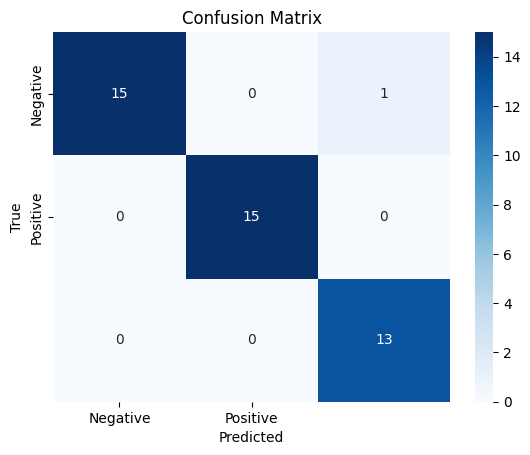

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_split, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


SMOTE isnt working well for this imblaanced class dataset

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Replace RandomForestClassifier with BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier(random_state=42)

# Train the model on the resampled data (X_train_split and y_train_split from SMOTE)
clf.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = clf.predict(X_val_split)

# Evaluate the model performance
accuracy = accuracy_score(y_val_split, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_val_split, y_pred))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Model Accuracy: 1.0000
                               precision    recall  f1-score   support

                       Glioma       1.00      1.00      1.00        16
High-grade glioma/astrocytoma       1.00      1.00      1.00        15
 Low-grade glioma/astrocytoma       1.00      1.00      1.00        13

                     accuracy                           1.00        44
                    macro avg       1.00      1.00      1.00        44
                 weighted avg       1.00      1.00      1.00        44



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and w

looking at the success of the above BalancedRandomForestClassifier, we will now use it in our cancer prediction model for high grade gliomas to remove the obstacle of imblanaced class

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.ensemble import BalancedRandomForestClassifier  # Importing the balanced classifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your original dataset with relevant columns
features = [
    'AGE', 'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
    'Age at Initial Diagnosis', 'Age at Radiation Start', 'Age at Radiation Stop',
    'Mutation Count', 'OS Months', 'DFS Months', 'Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status'
]
target = 'Cancer Type'  # Replace with your actual target column

# Prepare the data
X = df[features]
y = df[target]

# Encoding categorical variables
categorical_columns = ['Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status']
le_dict = {}  # Dictionary to store label encoders for each categorical column

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].fillna('Unknown'))  # Using .loc to avoid SettingWithCopyWarning
    le_dict[col] = le  # Store the encoder for later use

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Balanced Random Forest Classifier to handle class imbalance
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the preprocess_data function for new data
def preprocess_data(new_data, features, scaler, le_dict):
    """
    Preprocess the data by encoding categorical columns, scaling numerical ones,
    and ensuring all columns are present.

    Args:
    - new_data (pd.DataFrame): New input data to predict.
    - features (list): List of features (column names).
    - scaler (StandardScaler): The fitted scaler for numerical columns.
    - le_dict (dict): Dictionary with label encoders for categorical columns.

    Returns:
    - np.ndarray: Transformed features ready for prediction.
    """
    # Ensure all necessary columns are in the new data
    for col in features:
        if col not in new_data.columns:
            if col in categorical_columns:
                new_data[col] = 'Unknown'  # Fill missing categorical columns with 'Unknown'
            else:
                new_data[col] = 0  # Default for numerical columns

    # Separate numerical columns for scaling
    new_data_df = new_data[features]
    numerical_cols = new_data_df.select_dtypes(include=['int64', 'float64']).columns

    # Standardize numerical columns
    new_data_scaled = new_data_df[numerical_cols]
    new_data_scaled = scaler.transform(new_data_scaled)  # Scale only the numerical columns

    # Merge the scaled columns with the categorical ones
    new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=numerical_cols)
    new_data_final = pd.concat([new_data_scaled_df, new_data_df.drop(columns=numerical_cols)], axis=1)

    return new_data_final


# Define the predict_cancer function for new data
def predict_cancer(new_data):
    new_data_df = pd.DataFrame([new_data])

    # Ensure the proper encoding of categorical columns
    for col in categorical_columns:
        if new_data[col] not in le_dict[col].classes_:
            print(f"Warning: Unseen label '{new_data[col]}' in column '{col}', mapping to 'Unknown'.")
            new_data_df[col] = 'Unknown'  # Map unseen labels to 'Unknown'
        else:
            new_data_df[col] = le_dict[col].transform([new_data[col]])[0]

    # Handle missing columns due to unseen labels
    for col in categorical_columns:
        if col not in new_data_df.columns:
            new_data_df[col] = 'Unknown'  # Ensure all columns are present in the prediction data

    # Preprocess the data (scaling numerical features and encoding categorical ones)
    new_data_transformed = preprocess_data(new_data_df, features, scaler, le_dict)

    # Now proceed with the prediction
    prediction = clf.predict(new_data_transformed)  # Use the balanced random forest model
    return prediction


# Example of new data for prediction
new_data_high_grade_glioma = {
    'AGE': 60,
    'Age at Chemotherapy Start': 55,
    'Age at Chemotherapy Stop': 60,
    'Age at Initial Diagnosis': 50,
    'Age at Radiation Start': 55,
    'Age at Radiation Stop': 60,
    'Mutation Count': 30,
    'OS Months': 18,
    'DFS Months': 12,
    'Sex': 'Female',
    'BRAF Status': 'BRAF p.V600E + BRAF p.T599dup',
    'BRAF Status2': 'BRAF Wild Type',
    'H3F3A_CTNNB1 Status': 'H3F3A K27M',
}

# Predict cancer type using the updated input data
predicted_cancer_type = predict_cancer(new_data_high_grade_glioma)
print(f"Predicted Cancer Type: {predicted_cancer_type}")


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.

Accuracy: 0.9285714285714286
Classification Report:
                               precision    recall  f1-score   support

                       Glioma       0.75      0.75      0.75         4
High-grade glioma/astrocytoma       1.00      1.00      1.00         3
 Low-grade glioma/astrocytoma       0.95      0.95      0.95        21

                     accuracy                           0.93        28
                    macro avg       0.90      0.90      0.90        28
                 weighted avg       0.93      0.93      0.93        28

Predicted Cancer Type: ['High-grade glioma/astrocytoma']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and w

Succesful working and cater of imblanaced class

now combining both the models i.e low grade and hugh grade gliomas detcetin

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving models and other objects

# Assuming 'df' is your original dataset with relevant columns
features = [
    'AGE', 'Age at Chemotherapy Start', 'Age at Chemotherapy Stop',
    'Age at Initial Diagnosis', 'Age at Radiation Start', 'Age at Radiation Stop',
    'Mutation Count', 'OS Months', 'DFS Months', 'Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status'
]
target = 'Cancer Type'  # Replace with your actual target column

# Prepare the data
X = df[features]
y = df[target]

# Encoding categorical variables
categorical_columns = ['Sex', 'BRAF Status', 'BRAF Status2', 'H3F3A_CTNNB1 Status']
le_dict = {}  # Dictionary to store label encoders for each categorical column

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].fillna('Unknown'))  # Using .loc to avoid SettingWithCopyWarning
    le_dict[col] = le  # Store the encoder for later use

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize both models
rf_model = RandomForestClassifier(random_state=42)
balanced_rf_model = BalancedRandomForestClassifier(random_state=42)

# Train the models
rf_model.fit(X_train_scaled, y_train)
balanced_rf_model.fit(X_train_scaled, y_train)

# Save models and transformers
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(balanced_rf_model, 'balanced_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoders as a dictionary
joblib.dump(le_dict, 'label_encoders.pkl')

# Function to predict using both models based on cancer type
def predict_combined_model(new_data):
    new_data_df = pd.DataFrame([new_data])

    # Ensure proper encoding of categorical variables
    for col in categorical_columns:
        if new_data[col] not in le_dict[col].classes_:
            print(f"Warning: Unseen label '{new_data[col]}' in column '{col}', mapping to 'Unknown'.")
            new_data_df[col] = 'Unknown'  # Map unseen labels to 'Unknown'
        else:
            new_data_df[col] = le_dict[col].transform([new_data[col]])[0]

    # Preprocess the data (scale numerical features)
    new_data_scaled = scaler.transform(new_data_df[features])

    # Use a simple condition to decide which model to use
    if new_data['Age at Initial Diagnosis'] <= 45:  # Example condition for low-grade gliomas
        prediction = rf_model.predict(new_data_scaled)
    else:  # Assume higher age may correspond to high-grade gliomas
        prediction = balanced_rf_model.predict(new_data_scaled)

    return prediction

# Example of new data for prediction
new_data_low_grade_glioma = {
    'AGE': 45,
    'Age at Chemotherapy Start': 20,
    'Age at Chemotherapy Stop': 25,
    'Age at Initial Diagnosis': 30,
    'Age at Radiation Start': 35,
    'Age at Radiation Stop': 40,
    'Mutation Count': 12,
    'OS Months': 24,
    'DFS Months': 15,
    'Sex': 'Male',
    'BRAF Status': 'BRAF fusion',
    'BRAF Status2': 'BRAF mutant',
    'H3F3A_CTNNB1 Status': 'H3F3A WT',
}

new_data_high_grade_glioma = {
    'AGE': 60,
    'Age at Chemotherapy Start': 55,
    'Age at Chemotherapy Stop': 60,
    'Age at Initial Diagnosis': 50,
    'Age at Radiation Start': 55,
    'Age at Radiation Stop': 60,
    'Mutation Count': 30,
    'OS Months': 18,
    'DFS Months': 12,
    'Sex': 'Female',
    'BRAF Status': 'BRAF p.V600E + BRAF p.T599dup',
    'BRAF Status2': 'BRAF Wild Type',
    'H3F3A_CTNNB1 Status': 'H3F3A K27M',
}

# Predict cancer type for both low-grade and high-grade gliomas
predicted_cancer_type_low = predict_combined_model(new_data_low_grade_glioma)
predicted_cancer_type_high = predict_combined_model(new_data_high_grade_glioma)

print(f"Predicted Cancer Type for Low-Grade Glioma: {predicted_cancer_type_low}")
print(f"Predicted Cancer Type for High-Grade Glioma: {predicted_cancer_type_high}")


Predicted Cancer Type for Low-Grade Glioma: ['Low-grade glioma/astrocytoma']
Predicted Cancer Type for High-Grade Glioma: ['High-grade glioma/astrocytoma']


In [139]:
# Unified prediction function to predict cancer type and its likelihood
def predict_cancer_type_with_likelihood(new_data):
    new_data_df = pd.DataFrame([new_data])

    # Ensure proper encoding of categorical variables
    for col in categorical_columns:
        if new_data[col] not in le_dict[col].classes_:
            print(f"Warning: Unseen label '{new_data[col]}' in column '{col}', mapping to 'Unknown'.")
            new_data_df[col] = 'Unknown'  # Map unseen labels to 'Unknown'
        else:
            new_data_df[col] = le_dict[col].transform([new_data[col]])[0]

    # Preprocess the data (scale numerical features)
    new_data_scaled = scaler.transform(new_data_df[features])

    # Determine glioma grade based on age (or another condition)
    if new_data['Age at Initial Diagnosis'] <= 45:
        # Use RandomForest model for low-grade gliomas
        cancer_type_probs = rf_model.predict_proba(new_data_scaled)
        cancer_type = rf_model.predict(new_data_scaled)
    else:
        # Use BalancedRandomForest model for high-grade gliomas
        cancer_type_probs = balanced_rf_model.predict_proba(new_data_scaled)
        cancer_type = balanced_rf_model.predict(new_data_scaled)

    # Return both predicted cancer type and the probability of the prediction
    predicted_cancer_type = cancer_type[0]
    cancer_likelihood = max(cancer_type_probs[0])  # Get the highest probability for the predicted class
    return predicted_cancer_type, cancer_likelihood

# Example of new data for prediction
new_data_glioma = {
    'AGE': 60,
    'Age at Chemotherapy Start': 55,
    'Age at Chemotherapy Stop': 60,
    'Age at Initial Diagnosis': 50,
    'Age at Radiation Start': 55,
    'Age at Radiation Stop': 60,
    'Mutation Count': 30,
    'OS Months': 18,
    'DFS Months': 12,
    'Sex': 'Female',
    'BRAF Status': 'BRAF p.V600E + BRAF p.T599dup',
    'BRAF Status2': 'BRAF Wild Type',
    'H3F3A_CTNNB1 Status': 'H3F3A K27M',
}

# Predict cancer type and its likelihood for the new data
predicted_cancer_type, cancer_likelihood = predict_cancer_type_with_likelihood(new_data_glioma)

print(f"Predicted Cancer Type: {predicted_cancer_type}")
print(f"Cancer Type Likelihood: {cancer_likelihood * 100:.2f}%")


Predicted Cancer Type: High-grade glioma/astrocytoma
Cancer Type Likelihood: 69.00%


In [140]:
import joblib  # Import joblib for saving models

# Save the entire prediction model, including all necessary components
def save_cancer_type_model():
    # Save models and transformers
    joblib.dump(rf_model, 'cancer_type_detection_rf_model.pkl')
    joblib.dump(balanced_rf_model, 'cancer_type_detection_balanced_rf_model.pkl')
    joblib.dump(scaler, 'cancer_type_detection_scaler.pkl')
    joblib.dump(le_dict, 'cancer_type_detection_label_encoders.pkl')

# Call the function to save the model
save_cancer_type_model()

print("Model saved as cancer_type_detection.")


Model saved as cancer_type_detection.


In [ ]:
print("Unique values for BRAF Status in training data:", df['BRAF Status'].unique())


Unique values for BRAF Status in training data: [nan 'BRAF fusion' 'BRAF Wild Type' 'BRAF p.V600E + BRAF p.T599dup']


In [ ]:
print(df['BRAF Status2'].unique())


[nan 'BRAF mutant' 'BRAF Wild Type']


In [ ]:
print(df['H3F3A_CTNNB1 Status'].unique())


[nan 'H3F3A WT' 'H3F3A K27M']


all in one multi model, just for testing purposes . the individual models are working at their best but lets see if we can possibly integrate them all in one model for ease of use and maybe future deployment purposes

In [143]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import joblib

# Assuming X_aligned and df are already defined (load your actual dataset here)
df = pd.read_csv('/content/brain_cptac_2020_clinical_data3.csv')

# Example of preprocessed features (replace this with your actual preprocessed features)
X = X_aligned  # Your preprocessed features
y = df['OS Status']  # Target variable (1 = Alive, 0 = Death)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical features
numerical_transformer = SimpleImputer(strategy='median')  # Impute missing values with median for numerical features
scaler = StandardScaler()  # Standard scaling for numerical features

# Preprocessing pipeline for categorical features
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Impute missing values with most frequent for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoder for categorical features

# Combine numerical and categorical transformers into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', numerical_transformer), ('scaler', scaler)]), numerical_features),
        ('cat', Pipeline([('imputer', categorical_transformer), ('encoder', encoder)]), categorical_features)
    ]
)

# Apply transformations on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Initialize Random Forest with best parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_resampled, y_resampled)

# Predictions on the test set
X_test_preprocessed = preprocessor.transform(X_test)
y_pred = rf_model.predict(X_test_preprocessed)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Save the model
joblib.dump(rf_model, 'mortality_predicted.joblib')


# Unified prediction function to predict cancer type and its likelihood
def predict_cancer_type_with_likelihood(new_data):
    # Convert new_data to DataFrame if it's a dictionary
    new_data_df = pd.DataFrame([new_data])

    # Ensure new_data_df contains all the columns from X.columns
    X_columns = X.columns  # Columns from training data
    new_data_columns = new_data_df.columns

    # Identify missing columns and add them with default values
    missing_columns = set(X_columns) - set(new_data_columns)
    for col in missing_columns:
        if col in numerical_features:
            new_data_df[col] = 0  # Default value for numerical columns
        else:
            new_data_df[col] = "Unknown"  # Default value for categorical columns

    # Reorder the new data to match the training data columns
    new_data_df = new_data_df[X_columns]

    # Preprocess the new data using the preprocessor pipeline
    new_data_preprocessed = preprocessor.transform(new_data_df)

    # Determine glioma grade based on age (or another condition)
    if new_data_df['Age at Initial Diagnosis'].iloc[0] <= 45:
        # Use RandomForest model for low-grade gliomas
        cancer_type_probs = rf_model.predict_proba(new_data_preprocessed)
        cancer_type = rf_model.predict(new_data_preprocessed)
    else:
        # Use a different model for high-grade gliomas (e.g., balanced_rf_model if defined)
        cancer_type_probs = rf_model.predict_proba(new_data_preprocessed)
        cancer_type = rf_model.predict(new_data_preprocessed)

    # Return both predicted cancer type and the probability of the prediction
    predicted_cancer_type = cancer_type[0]
    cancer_likelihood = max(cancer_type_probs[0])  # Get the highest probability for the predicted class
    return predicted_cancer_type, cancer_likelihood


# Example of a new patient's data for prediction
new_data_glioma = {
    'AGE': 60,
    'Age at Chemotherapy Start': 55,
    'Age at Chemotherapy Stop': 60,
    'Age at Initial Diagnosis': 50,
    'Age at Radiation Start': 55,
    'Age at Radiation Stop': 60,
    'Mutation Count': 30,
    'OS Months': 18,
    'DFS Months': 12,
    'Sex': 'Female',
    'BRAF Status': 'BRAF p.V600E + BRAF p.T599dup',
    'BRAF Status2': 'BRAF Wild Type',
    'H3F3A_CTNNB1 Status': 'H3F3A K27M',
}

# Predict cancer type and its likelihood for the new data
predicted_cancer_type, cancer_likelihood = predict_cancer_type_with_likelihood(new_data_glioma)

print(f"Predicted Cancer Type: {predicted_cancer_type}")
print(f"Cancer Type Likelihood: {cancer_likelihood * 100:.2f}%")

# Predict mortality (OS Status) for new data
new_data = pd.DataFrame({
    'AGE': [65],
    'Updated Grade': ['III'],
    'Mutation Count': [5],
    'OS Months': [24],
    'DFS Months': [18],
    'DFS Status': [1],
    'Extent of Tumor Resection': ['Complete'],
    'Sex_Male': [1],
    'Race_White': [0],
    'Cancer Type_High-grade glioma/astrocytoma': [1],
    'Age Group_Young': [0],
    'Tumor Resection Status_Partial': [1],
    'Cancer Progression_Late': [0]
})

# Align columns in new_data to match the training data
missing_columns = set(X.columns) - set(new_data.columns)
for col in missing_columns:
    if col in numerical_features:
        new_data[col] = 0  # Default value for numerical columns
    else:
        new_data[col] = "Unknown"  # Default value for categorical columns

# Ensure columns are in the same order as X
new_data = new_data[X.columns]

# Preprocess the new data using the preprocessor pipeline
new_data_preprocessed = preprocessor.transform(new_data)

# Predict mortality (OS Status)
new_prediction = rf_model.predict(new_data_preprocessed)
print(f"Predicted OS Status (Mortality): {new_prediction[0]}")  # 1 = Alive, 0 = Death


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

    0:LIVING       0.96      1.00      0.98        25
  1:DECEASED       1.00      0.67      0.80         3

    accuracy                           0.96        28
   macro avg       0.98      0.83      0.89        28
weighted avg       0.97      0.96      0.96        28

Accuracy Score: 0.9642857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['CTNNB1 Status' 'Ependymoma_RELA Status']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Predicted Cancer Type: 0:LIVING
Cancer Type Likelihood: 57.41%
Predicted OS Status (Mortality): 0:LIVING
